# Comparing the distributions of distances from supernova

Here, distributions of distances between core sequences and the core of Supernova are compared. The two datasets being compared are the CDP selection which yilded Supernova, the second dataset is a MUP selection. Both datasets have the same initial pool.

In [1]:
# Import libraries
import pandas as pd
from ivstools import tools
import matplotlib.pyplot as plt

In [2]:
# Matplotlib settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Arial'

In [3]:
def seqDist(s1, s2, count_gaps=False):
    '''
    Get the distance between two sequences
    s1:          sequence1 (str)
    s2:          sequence2 (str)
    count_gaps:  if True get absolute distance, if False (default), gaps (-) do not increment the distance between two seqs
    returns:     distance (int)
    '''

    if count_gaps == True:
        return sum([1 if b1 != b2 else 0 for b1, b2 in zip(s1, s2)])
    else:
        mutSum = 0
        for b1, b2 in zip(s1, s2):
            if '-' in b1 + b2:
                pass
            else:
                if b1 != b2:
                    mutSum += 1
        return mutSum

In [4]:
# Read the datasets

df_mv = pd.read_csv('/home/kurfurst/Documents/datasets/MV_MUP_full_FAcounts.tsv', sep='\t', names=['count', 'seq'])
df_ks = pd.read_csv('/home/kurfurst/Documents/datasets/KS_CDP_round6.tsv', sep='\t', names=['count', 'seq'])

In [5]:
# Define the reference sequences

sn_full = tools.supernova_full # GGAAGAGATGGCGACGACACAGGGACGATGCCGAATATCCTCAGTGCGCAGGGCCGCAGGGGGGAGTGACTTGGGATGGGGGGTC'
sn_core = tools.supernova_core # GGAAGAGAATATCCCCGGGGAGTGACTTGGGATGGGGG
core_pos = tools.supernova_core_positions # [1,2,3,4,5,6,33,34,35,36,37,38,39,40,41,42,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82]
core_pos_0based = [x - 1 for x in core_pos]

In [6]:
# Extract cores

df_mv['core'] = [''.join([s[x] for x in core_pos_0based]) for s in df_mv['seq']]
df_ks['core'] = [''.join([s[x] for x in core_pos_0based]) for s in df_ks['seq']]

In [7]:
# Compute distances of core and full variants from sn core or full respectively

df_mv['fullDist'] = [seqDist(sn_full, s) for s in df_mv['seq']]
df_ks['fullDist'] = [seqDist(sn_full, s) for s in df_ks['seq']]

df_mv['coreDist'] = [seqDist(sn_core, s) for s in df_mv['core']]
df_ks['coreDist'] = [seqDist(sn_core, s) for s in df_ks['core']]

In [8]:
mean_mv_full = round(df_mv['fullDist'].mean(), 2)
mean_ks_full = round(df_ks['fullDist'].mean(), 2)

---
Here is what the comparison of the distributions looks like when we use full-length sequecnes..

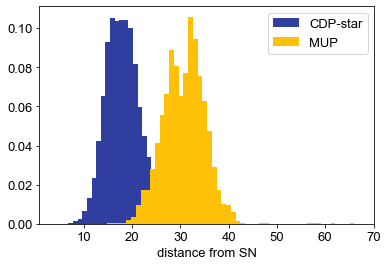

In [9]:
plt.hist(df_ks['fullDist'], bins=max(df_ks['fullDist'])-1, label='CDP-star', color='#303f9f', density=True)
plt.hist(df_mv['fullDist'], bins=max(df_mv['fullDist'])-8, label='MUP', color='#ffc107', density=True)
plt.xlabel('distance from SN')
plt.legend()
plt.savefig('fig2c_v2.png', dpi=180)

In [10]:
print("The mean of the CDP-star peak: ", mean_ks_full)
print("The mean of the MUP peak: ", mean_mv_full)

The mean of the CDP-star peak:  18.42
The mean of the MUP peak:  30.68


---
And here it is for the core regions

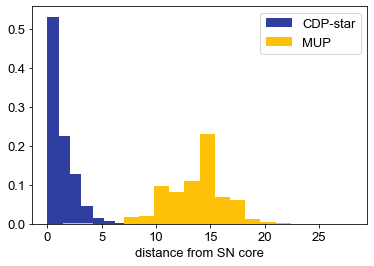

In [11]:
plt.hist(df_ks['coreDist'], bins=max(df_ks['coreDist'])-1, label='CDP-star', color='#303f9f', density=True)
plt.hist(df_mv['coreDist'], bins=max(df_mv['coreDist'])-8, label='MUP', color='#ffc107', density=True)
plt.xlabel('distance from SN core')
plt.legend()
plt.show()

---
Here is the original figure, mean values for each of the peaks separately.

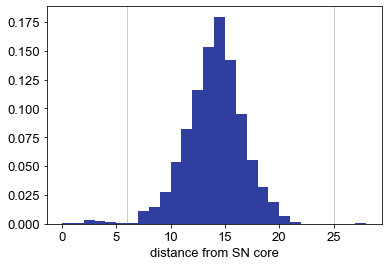

In [12]:
plt.hist(df_mv['coreDist'], bins=max(df_mv['coreDist']), color='#303f9f', density=True)
plt.axvline(6, linewidth=1, alpha=0.4, color='grey')
plt.axvline(25, linewidth=1, alpha=0.4, color='grey')
plt.xlabel('distance from SN core')
plt.show()

The mean value for the peak on the left is:

In [13]:
print(df_mv[df_mv['coreDist'] <= 6]['coreDist'].mean())

2.986013986013986


for the peak on the right it is:

In [14]:
print(df_mv[df_mv['coreDist'] > 6]['coreDist'].mean())

13.622783488024307


The mean of the distribution in the KS_rnd6 dataset is 

In [15]:
print(df_ks['coreDist'].mean())

1.6164691918881864
